In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from read_data import DataFeatures
import os, sys
import util


/home/harry/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [3]:
x = util.load_pkl('weebit_features.pkl')

In [4]:
x.get_wc({'min_df':5, 'strip_accents':'ascii'})

matrix([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 1, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]])

# Most common words

In [53]:
counts = np.sum(x.count_matrix, 0).A.squeeze()
sort = np.argsort(counts)
words = np.array(x.wc.get_feature_names())
words[sort][::-1][:20] # Sort descending and get first couple
# plt.hist(np.log(counts), bins=100)

array(['the', 'to', 'of', 'in', 'and', 'is', 'that', 'are', 'it', 'for',
       'on', 'they', 'people', 'have', 'with', 'from', 'was', 'you',
       'about', 'or'], dtype='<U15')

# Natural Language Features

In [21]:
cols = [ "", "ADJ", "ADP", "ADV", "AUX", "CONJ", "CCONJ", "DET", "INTJ", "NOUN", "NUM", "PART", "PRON", "PROPN", "PUNCT", "SCONJ", "SYM", "VERB", "X", "EOL", "SPACE", 'NC', 'NSENTS', 'AVGSENTLEN']

nl = pd.DataFrame(x.nl_matrix, columns=cols)
nl['level'] = x.labels
nl['length'] = nl.AVGSENTLEN * nl.NSENTS

In [22]:
grouped = nl.groupby('level')

In [ ]:
grouped.hist(bins=40)

In [124]:
def plot_hist(df, feat, f_string, x_label):
    f, ax = plt.subplots()
    for i in [2, 3, 4]:
        temp = df[df.level == i]
        ax.hist(temp[feat], alpha = 0.4, bins=40, label='level {}'.format(str(i)), normed=True)
    ax.set_xlim(min(df[feat]), max(df[feat]))
    ax.set_xlabel(x_label)
    ax.set_ylabel('normalized frequency')
#     plt.title('Distribution of {}'.format(f_string))
    plt.legend()
    plt.savefig(feat + '.png')
    plt.clf()
    


In [125]:
normalized = nl.copy()
for col in normalized.columns:
    if col != 'level':
        normalized[col] /= normalized.length

In [129]:
# plot_hist(nl, 'AVGSENTLEN', 'average sentence length', 'average sentence length (words)')
# plot_hist(nl, 'length', 'length', 'length of document (words)')
# plot_hist(normalized, 'NOUN', 'length', 'number of nouns normalized by document length')
plot_hist(nl, 'NOUN', 'length', 'number of nouns')




/home/harry/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


<Figure size 432x288 with 0 Axes>

AttributeError: Unknown property bin

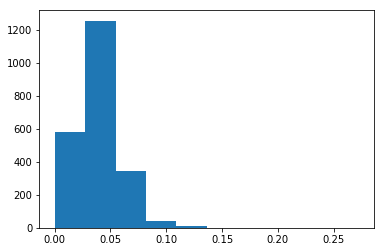